0.43841786277210903
0.5615821372278909


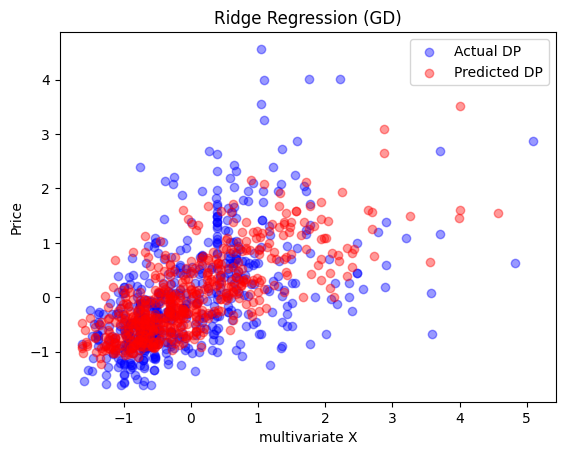

In [ ]:
# Ridge Regression Implementation using OLS (L2 penalty)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

csv_data=pd.read_csv('Housing.csv')
# print(csv_data)
# area, bedrooms, bathrooms, stories, parking to predict price
x_pn = np.array(
    csv_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y_pn = np.array(csv_data['price'])

# Normalizing the data using z^2 normalization
x=(x_pn-np.mean(x_pn,axis=0))/np.std(x_pn,axis=0)
y=(y_pn-np.mean(y_pn))/np.std(y_pn)

# Implementing ridge regression
xT=np.transpose(x)
xTx=np.dot(xT,x)

# regularization parameter
L=0.7

xTx_shape=np.shape(xTx)

# identity matrix
# shape of indentity matrix is the shape of xTx
I=np.identity(xTx_shape[0])

LI=np.dot(L,I)

# parameter 1
# (xTx+LI)^-1
parameter_1 = np.linalg.inv((xTx+LI))

# parameter 2
xTy=np.dot(xT,y)

# beta cofficient
beta_cofficient=np.dot(parameter_1,xTy)

# predicted_value
y_predicted=np.dot(x,beta_cofficient)

# model evaluation
# mse sensitive to outliers, good in regularization
mse=mean_squared_error(y,y_predicted)
print(mse)

# r2 score measures the prediction, how well the prediction
r2=r2_score(y,y_predicted)
print(r2)


# plotting
plt.scatter(x[:,0],y,color='blue',alpha=0.4,label='Actual DP')
plt.scatter(y,y_predicted,color='red',alpha=0.4,label='Predicted DP')
plt.legend()
plt.xlabel('multivariate X')
plt.ylabel('Price')
plt.title('Ridge Regression (OLS)')
plt.show()